## Feature Importance and Feature Selection


In [27]:
import opensmile 
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
base_path = "/home/ubuntu/"

In [2]:
smile_lld_ComParE = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors)

In [3]:
smile_functionals_ComParE = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals)

In [4]:
len(smile_lld_ComParE.feature_names), len(smile_functionals_ComParE.feature_names)

(65, 6373)

In [5]:
def load_files(path, smile_object):
    
    results = pd.DataFrame()
    
    for file in os.listdir(path):
        if file.endswith('.wav'):
            df = smile_object.process_file(os.path.join(path,file))
            results = pd.concat([results,df])
        
    return results

In [ ]:
#real_path = base_path + 'data/LJSpeech_1.1/wavs'
#LJ_df = load_files(real_path, smile_functionals_ComParE)
#LJ_df['label'] = 0

In [ ]:
#fake_path = base_path + 'data/generated_audio/ljspeech_melgan'
#LJ_melgan_df = load_files(fake_path, smile_functionals_ComParE)
#LJ_melgan_df['label'] = 1

In [6]:
#df = pd.concat([LJ_df, LJ_melgan_df]).reset_index()
#df = df.drop(columns=['file', 'start', 'end'])
#df = df.drop(columns=['index'])
#df.head()
#df.to_csv("LJ_data.csv", index=False)

In [7]:
df = pd.read_csv('LJ_data.csv') 

In [15]:
df.head()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
0,2.099941,0.343387,0.324826,0.354715,0.725741,1.090693,0.371026,0.364952,0.735978,0.041864,...,0.504981,2.546241,2.521457,19.398075,0.628979,121.984960,59.496933,117.796585,65.289440,0
1,2.533632,0.068309,0.703248,0.335741,0.633005,1.001228,0.297265,0.368223,0.665487,0.051697,...,0.546077,2.918131,2.910355,19.985882,0.511944,112.430940,62.909290,109.902760,62.800247,0
2,3.201969,0.032761,0.414977,0.306927,0.563597,0.967056,0.256670,0.403459,0.660129,0.022576,...,0.604696,3.036099,3.021155,19.887371,0.419572,119.925610,53.650510,124.429054,66.430270,0
3,2.132061,0.482927,0.756098,0.329450,0.573809,0.872452,0.244359,0.298642,0.543002,0.058282,...,0.513366,2.742253,2.719651,19.578907,0.476384,113.971695,61.368904,100.163284,46.827637,0
4,1.704395,0.049231,0.996923,0.397651,0.639775,1.019447,0.242124,0.379672,0.621796,0.070310,...,0.560816,2.984021,2.971971,19.938366,0.536333,111.777840,54.201256,116.725784,65.241610,0


In [9]:
y = df['label'].copy()
X = df.drop(columns=['label']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
X_train.head()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
12314,2.807749,0.771739,0.528261,0.361313,0.646688,0.984944,0.285375,0.338256,0.623631,0.048827,...,8.319755,0.438920,3.258167,3.254646,19.999836,0.522718,138.06772,71.79388,132.14476,65.224010
6199,2.243875,0.302191,0.694348,0.374127,0.635225,1.019418,0.261097,0.384193,0.645290,0.079765,...,10.851734,0.596247,2.824893,2.821124,19.999441,0.430687,109.74812,59.50891,115.39771,66.759850
17336,1.824032,0.642857,0.136364,0.232688,0.498471,0.793325,0.265784,0.294853,0.560637,0.028348,...,10.048426,0.527548,2.836391,2.824780,19.935629,0.584289,137.42131,79.96077,121.23398,72.475270
19670,2.673396,0.609495,0.577335,0.205649,0.540254,0.962786,0.334605,0.422532,0.757136,0.030687,...,8.131776,0.591871,2.547253,2.532104,19.809875,0.576189,117.90951,68.86835,113.43879,57.941456
23490,2.115954,0.747231,0.357503,0.309493,0.588864,0.975181,0.279371,0.386317,0.665688,0.045347,...,8.736636,0.520751,2.929375,2.921051,19.981910,0.709031,141.48637,75.13283,124.25812,60.296734


## Feature Importance

Random forest regressor - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [16]:
#hyperparameter selection
n_estimators = 1000 #default=100
criterion = "gini" #{“gini”, “entropy”, “log_loss”}, default=”gini”
max_depth = 10 #default=None 
min_samples_split = 2 #default=2 The minimum number of samples required to split an internal node
min_samples_leaf = 1 #default=1 The minimum number of samples required to be at a leaf node.
min_weight_fraction_leaf = 0.0 #The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
max_features = "sqrt" #default="sqrt" The number of features to consider when looking for the best split:
max_leaf_nodes = None #Grow trees with max_leaf_nodes in best-first fashion.
min_impurity_decrease = 0.0 #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
bootstrap = True #default = True Whether bootstrap samples are used when building trees.
oob_score = True #default = False Whether to use out-of-bag samples to estimate the generalization score.
n_jobs = -1 #default=None -1 means all processors
random_state = None #deafult=None controls randomness of bootstrapping
verbose = 0 
warm_start = False #deafult = False When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
max_samples = None #If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [17]:
#define model
model_rfc = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                criterion=criterion,
                                max_features=max_features,
                                bootstrap=bootstrap,
                                oob_score=oob_score,
                                n_jobs=n_jobs
                                )

#fit model
model_rfc.fit(X_train,y_train)

#get feature importance 
importance = model_rfc.feature_importances_

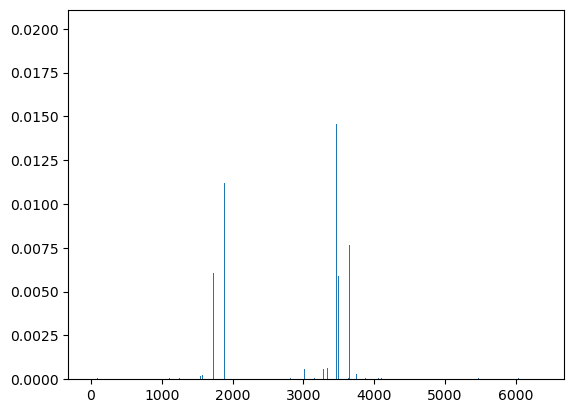

In [18]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
features = X.columns.to_list()
top_15_features = np.argsort(importance)[-15:]
tresh=importance[top_15_features[0]]
# summarize feature importance
for i,v in enumerate(importance):
    if v >= tresh:
        print('Feature: %s, Score: %.5f' % (features[i],v))

Feature: mfcc_sma[8]_lpc1, Score: 0.01716
Feature: mfcc_sma[9]_lpc1, Score: 0.01415
Feature: mfcc_sma[10]_lpc1, Score: 0.01470
Feature: mfcc_sma[11]_lpc1, Score: 0.01530
Feature: mfcc_sma[12]_lpc1, Score: 0.01591
Feature: mfcc_sma[13]_lpc1, Score: 0.02009
Feature: mfcc_sma[14]_lpc1, Score: 0.01629
Feature: mfcc_sma_de[6]_lpc0, Score: 0.01646
Feature: mfcc_sma_de[6]_lpc1, Score: 0.01570
Feature: mfcc_sma_de[6]_lpc2, Score: 0.01639
Feature: mfcc_sma_de[8]_lpc0, Score: 0.01468
Feature: mfcc_sma_de[8]_lpc2, Score: 0.01460
Feature: mfcc_sma_de[10]_lpc2, Score: 0.01693
Feature: mfcc_sma_de[11]_lpc1, Score: 0.01550
Feature: mfcc_sma_de[12]_lpc1, Score: 0.01656


## Feature Selection

In [22]:
# feature selection
def select_features(model, X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(model, max_features=15)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [32]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(model_rfc, X_train, y_train, X_test)
# fit the model
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train_fs, y_train)
# evaluate the model
yhat = model_lr.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.93


## Test on in the wild deepfake

Biden twitter deepfake - https://twitter.com/Finanzas_Times/status/1626004270829928448?t=VU_2BRhMHvrNyms6jQnx8w&s=08

Biden reddit deepfake - https://www.reddit.com/r/shitposting/comments/1165xnx/now_thats_my_president/?utm_source=share&utm_medium=ios_app&utm_name=iossmf

In [28]:
jb_dfitw1 = base_path + "data/InTheWildFakes/Biden/Original/biden-reddit-fake.wav"
jb_dfitw2 = base_path + "data/InTheWildFakes/Biden/Original/biden-twitter-fake.wav"

In [29]:
jb_dfitw1_df = smile_functionals_ComParE.process_file(jb_dfitw1)
jb_dfitw2_df = smile_functionals_ComParE.process_file(jb_dfitw2)

In [30]:
model_lr.predict(fs.transform(jb_dfitw1_df))

array([0])

In [31]:
model_lr.predict(fs.transform(jb_dfitw2_df))

array([0])